PROJET MACHINE LEARNING- TRAVAIL AVEC DATA "Machine Learning and Data Science Survey  2018"
LE Hoang Khoi(Centrale Lyon)


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Introduction of data: https://www.kaggle.com/kaggle/kaggle-survey-2018

Welcome to Kaggle's second annual Machine Learning and Data Science Survey ― and our first-ever survey data challenge.

This year, as last year, we set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live for one week in October, and after cleaning the data we finished with 23,859 responses, a 49% increase over last year!

There's a lot to explore here. The results include raw numbers about who is working with data, what’s happening with machine learning in different industries, and the best ways for new data scientists to break into the field. We've published the data in as raw a format as possible without compromising anonymization, which makes it an unusual example of a survey dataset.

The challenge objective: tell a data story about a subset of the data science community represented in this survey, through a combination of both narrative text and data exploration. A “story” could be defined any number of ways

On decide à choisir cet data pour avoir de vision sur le monde de DS et ML

Etape de charger des donnee

In [4]:
data = pd.read_csv("multipleChoiceResponses.csv", skiprows=[1])
data.shape

D:\Python 3.7\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (157,172,174,210,218,219,246,368,371,384,389,390,391,393) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23859, 395)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23859 entries, 0 to 23858
Columns: 395 entries, Time from Start to Finish (seconds) to Q50_OTHER_TEXT
dtypes: float64(14), int64(36), object(345)
memory usage: 71.9+ MB


In [4]:
data.describe()

,Time from Start to Finish (seconds),Q1_OTHER_TEXT,Q6_OTHER_TEXT,Q7_OTHER_TEXT,Q11_OTHER_TEXT,Q12_Part_1_TEXT,Q12_Part_2_TEXT,Q12_Part_3_TEXT,Q12_Part_4_TEXT,Q12_Part_5_TEXT,...,Q35_Part_6,Q35_OTHER_TEXT,Q36_OTHER_TEXT,Q37_OTHER_TEXT,Q38_Part_19,Q38_Part_20,Q38_OTHER_TEXT,Q42_OTHER_TEXT,Q49_OTHER_TEXT,Q50_OTHER_TEXT
count,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,23859.000000,...,15745.000000,23859.000000,23859.000000,23859.000000,0.0,0.0,23859.000000,23859.000000,23859.000000,23859.000000
mean,12112.764617,-0.886542,17.326963,6.850748,2.574752,34.288612,5.774844,4.690138,274.524917,6.074312,...,2.283624,2.453162,9.493818,0.401148,NaN,NaN,17.407896,-0.098831,-0.402364,2.589589
std,47208.641461,2.243926,97.431209,51.218150,30.016445,158.419947,43.965336,40.713215,705.708679,48.745801,...,11.717486,27.462530,61.601638,14.044027,NaN,NaN,95.451562,11.083836,8.160236,30.891474
min,16.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000
25%,570.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000
50%,1021.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000
75%,1842.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,23.000000,-1.000000,...,0.000000,-1.000000,-1.000000,-1.000000,NaN,NaN,-1.000000,-1.000000,-1.000000,-1.000000
max,885639.000000,67.000000,861.000000,556.000000,397.000000,1209.000000,503.000000,481.000000,3365.000000,548.000000,...,100.000000,362.000000,626.000000,234.000000,NaN,NaN,844.000000,205.000000,167.000000,407.000000


In [5]:
data.head(10)

,Time from Start to Finish (seconds),Q1,Q1_OTHER_TEXT,Q2,Q3,Q4,Q5,Q6,Q6_OTHER_TEXT,Q7,...,Q49_OTHER_TEXT,Q50_Part_1,Q50_Part_2,Q50_Part_3,Q50_Part_4,Q50_Part_5,Q50_Part_6,Q50_Part_7,Q50_Part_8,Q50_OTHER_TEXT
0,710,Female,-1,45-49,United States of America,Doctoral degree,Other,Consultant,-1,Other,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
1,434,Male,-1,30-34,Indonesia,Bachelor’s degree,Engineering (non-computer focused),Other,0,Manufacturing/Fabrication,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,718,Female,-1,30-34,United States of America,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,621,Male,-1,35-39,United States of America,Master’s degree,"Social sciences (anthropology, psychology, soc...",Not employed,-1,NaN,...,-1,NaN,NaN,Requires too much technical knowledge,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
4,731,Male,-1,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,-1,I am a student,...,-1,NaN,Too time-consuming,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
5,1142,Male,-1,25-29,Colombia,Bachelor’s degree,Physics or astronomy,Data Scientist,-1,Computers/Technology,...,-1,NaN,NaN,NaN,Afraid that others will use my work without gi...,NaN,I had never considered making my work easier f...,NaN,NaN,-1
6,959,Male,-1,35-39,Chile,Doctoral degree,"Information technology, networking, or system ...",Other,1,Academics/Education,...,-1,Too expensive,NaN,NaN,NaN,NaN,I had never considered making my work easier f...,NaN,NaN,-1
7,1758,Male,-1,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,2,Other,...,-1,NaN,NaN,NaN,NaN,Not enough incentives to share my work,NaN,NaN,NaN,-1
8,641,Male,-1,25-29,Turkey,Master’s degree,Engineering (non-computer focused),Not employed,-1,NaN,...,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
9,751,Male,-1,30-34,Hungary,Master’s degree,Engineering (non-computer focused),Software Engineer,-1,Online Service/Internet-based Services,...,-1,NaN,Too time-consuming,NaN,Afraid that others will use my work without gi...,NaN,NaN,NaN,NaN,-1


## On decouvre à la question de base et faire des visualization

In [5]:
total_count = data.shape[0]
data['Q1'].value_counts()/total_count*100

Male                       81.436774
Female                     16.807075
Prefer not to say           1.425039
Prefer to self-describe     0.331112
Name: Q1, dtype: float64

Apres regarde de data, on decide à utilise value_count pour eviter la valeur maquant

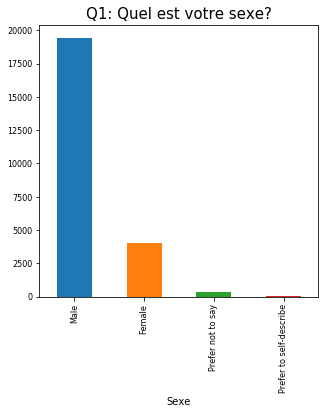

In [6]:
data['Q1'].value_counts().sort_values(ascending=False).plot.bar(figsize=(5,5), fontsize=8)
plt.xlabel('Sexe', fontsize=10)
plt.title('Q1: Quel est votre sexe?', fontsize=15)
plt.show()

La plupart de Data Scientist est masculin

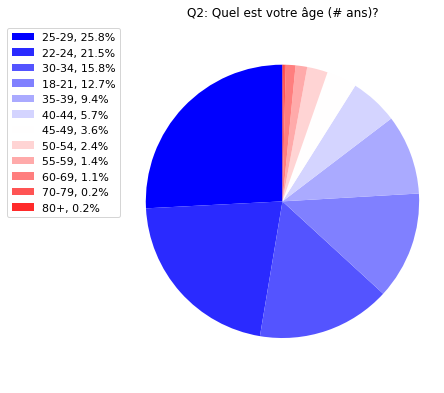

In [7]:
ages = data['Q2'].value_counts().sort_values(ascending=False)

sizes = list(ages.values)
labels = list(ages.index)
fig1, ax1 = plt.subplots(figsize=(6, 5))
fig1.subplots_adjust(0.3,0,1,1)


theme = plt.get_cmap('bwr')
ax1.set_prop_cycle("color", [theme(1. * i / len(sizes)) for i in range(len(sizes))])

_, _ = ax1.pie(sizes, startangle=90)

ax1.axis('equal')

total = sum(sizes)
plt.legend(loc='upper left', labels=['%s, %1.1f%%' % (l, (float(s) / total) * 100) for l, s in zip(labels, sizes)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Q2: Quel est votre âge (# ans)?')
plt.show()

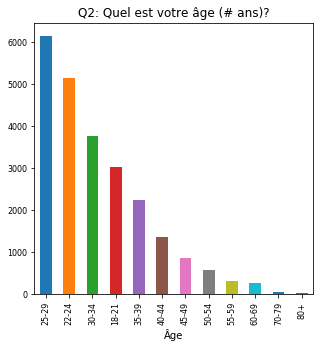

In [8]:
data['Q2'].value_counts().sort_values(ascending=False).plot.bar(figsize=(5,5), fontsize=8)
plt.xlabel('Âge', fontsize=10)
plt.title('Q2: Quel est votre âge (# ans)?')
plt.show()

La plupart de data scientist est dans l'age (22~29)

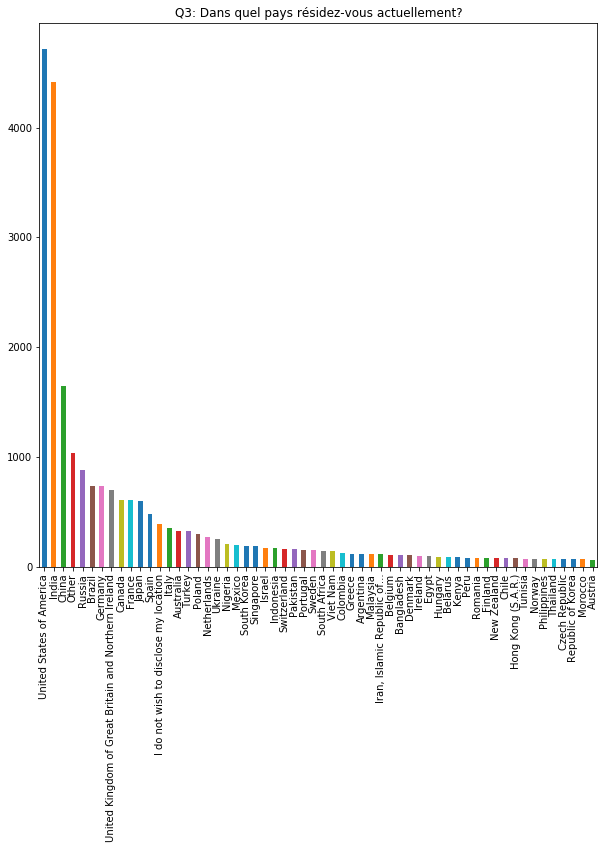

Nombreux de personne interrogée: 23859
Nombreux de pays des personne interrogée:  58
Pays a plus de personne interrogée est United States of America with 4716 personne


In [9]:
data['Q3'].value_counts().sort_values(ascending=False).plot(kind='bar', title='Q3: Dans quel pays résidez-vous actuellement?', figsize=(10,10))
plt.show()
print('Nombreux de personne interrogée:', data.shape[0])
print('Nombreux de pays des personne interrogée: ', data["Q3"].nunique())
print("Pays a plus de personne interrogée est", data['Q3'].value_counts().index[0], 'with', data['Q3'].value_counts().values[0], 'personne')


On peut voir que à Etat-Unis, les gens faisent cet survey le plus nombreux

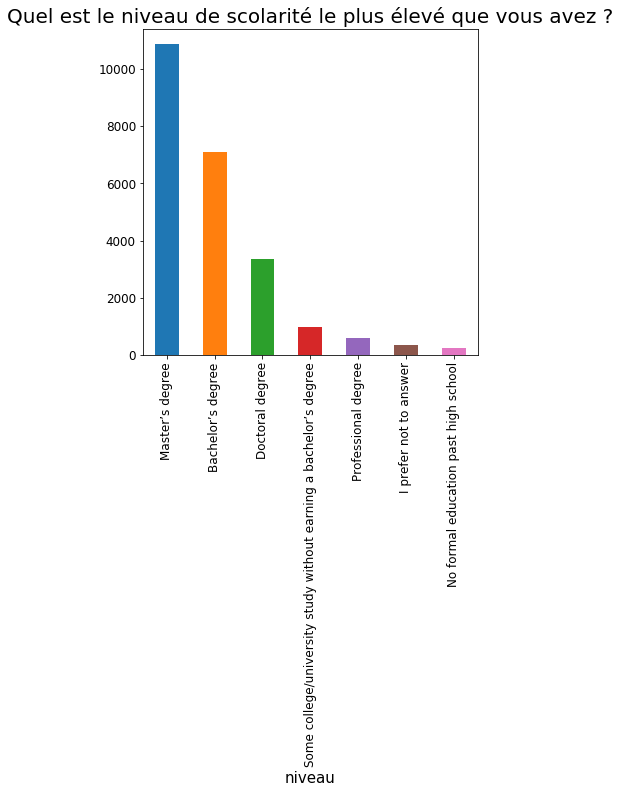

In [10]:
data['Q4'].value_counts()
data['Q4'].value_counts().plot.bar(figsize=(6,6), fontsize=12)
plt.xlabel('niveau', fontsize=15)
plt.title('Quel est le niveau de scolarité le plus élevé que vous avez ?', fontsize=20)
plt.show()

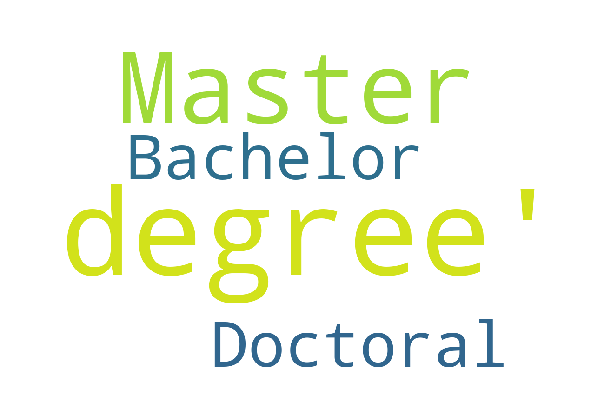

In [11]:
degree = data['Q4'].dropna().values
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color='white',width=1200,height=800).generate(str(degree))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

Niveau Master est niveau le plus nombreux

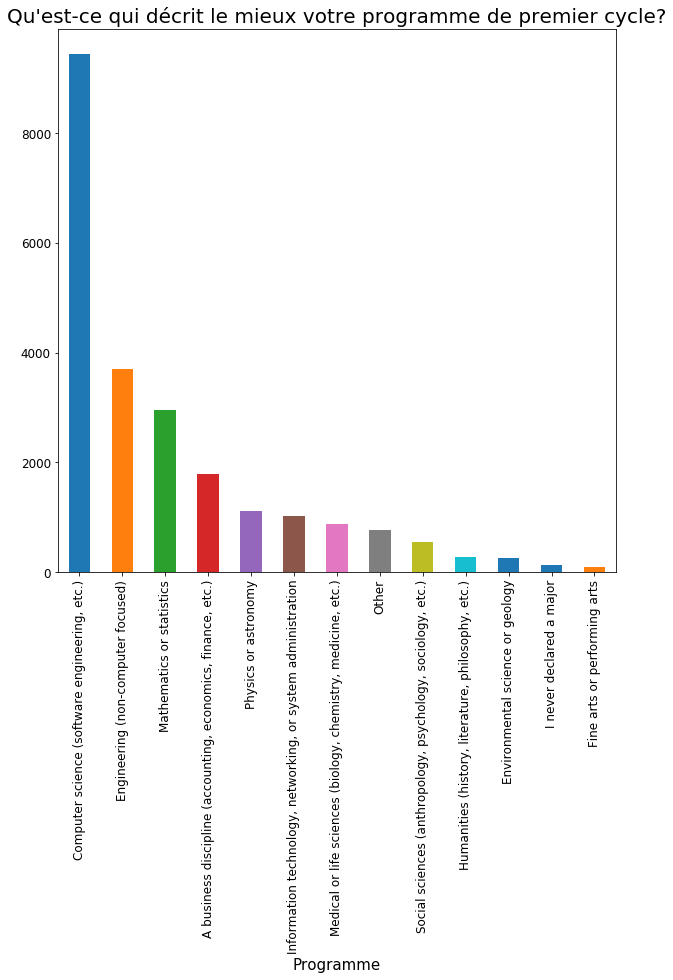

In [12]:
data['Q5'].value_counts()
data['Q5'].value_counts().plot.bar(figsize=(10,10), fontsize=12)
plt.xlabel('Programme', fontsize=15)
plt.title('Qu\'est-ce qui décrit le mieux votre programme de premier cycle?', fontsize=20)
plt.show()

On voit que des person qui fait survey non seulement étudier dans le domaine IT au début mais dans des domaines diversifié comme Humainities aussi. 

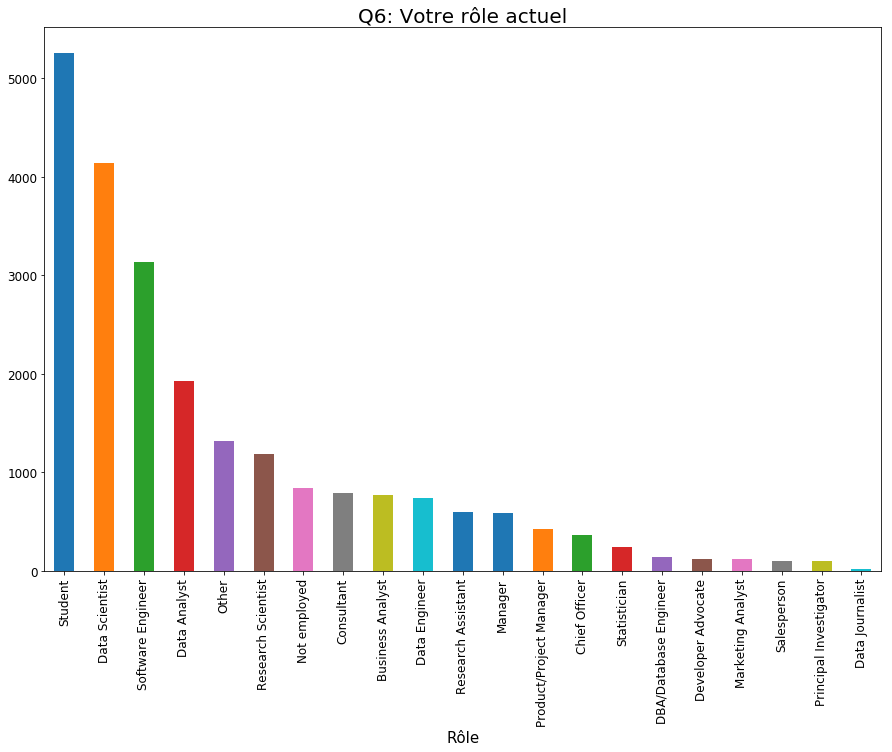

In [13]:
data['Q6'].value_counts()
data['Q6'].value_counts().plot.bar(figsize=(15,10), fontsize=12)
plt.xlabel('Rôle', fontsize=15)
plt.title('Q6: Votre rôle actuel', fontsize=20)
plt.show()

Sur Kaggle, le plupart des membres sont des étudiants. C'est logique de voir que l'etudiant fait ce survey beaucoup.

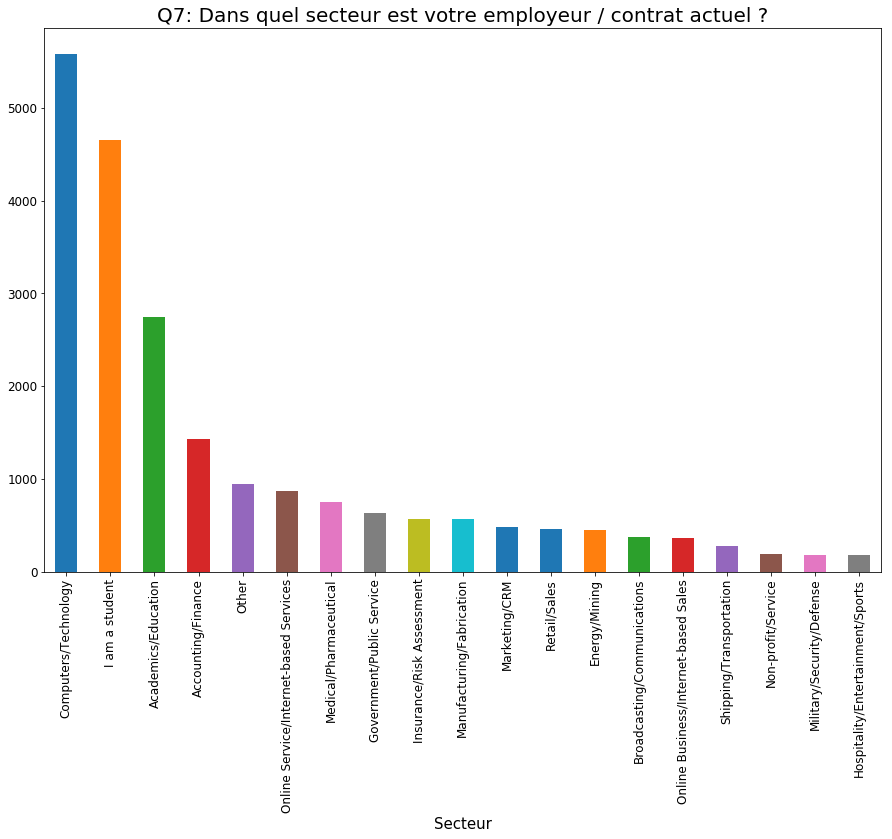

In [14]:
data['Q7'].value_counts()
data['Q7'].value_counts().plot.bar(figsize=(15,10), fontsize=12)
plt.xlabel('Secteur', fontsize=15)
plt.title('Q7: Dans quel secteur est votre employeur / contrat actuel ?', fontsize=20)
plt.show()

On voit que des person qui fait survey non seulement travailler dans le domaine IT au début mais dans des domaines diversifié comme Marketing aussi. 

## Maintenant on va essayer de construire un modele pour déviner Data Scientist

In [40]:
data = pd.read_csv("multipleChoiceResponses.csv", skiprows=[1])
data.shape

D:\Python 3.7\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (157,172,174,210,218,219,246,368,371,384,389,390,391,393) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(23859, 395)

### On choisi 12 category aléatoire pour construire notre modele et on utilise get_dummy pour traiter ce type donne categorical.

In [41]:
edu_df = pd.get_dummies(data['Q4'], prefix="edu")
edu_field_df = pd.get_dummies(data['Q5'], prefix="edu_field")
work_field_df = pd.get_dummies(data['Q7'], prefix="work_field")
ml_tool_df = pd.get_dummies(data['Q20'], prefix="ml_tool")
ml_blackbox_df = pd.get_dummies(data['Q48'], prefix="Q48")
primary_tool_df = pd.get_dummies(data['Q12_MULTIPLE_CHOICE'], prefix="prim_tool")

In [42]:
def get_column_names(data, question):
    cols = data.columns[data.columns.str.contains(question)]
    new_cols = []
    for c in cols:
        n = data[c].dropna().values
        if len(n) == 0:
            n = [c]
        new_cols.append(question.split("_")[0] + "_" + n[0])
    return new_cols    

In [43]:
columns = []
for c in data.columns:
    if "Q" not in c:
        continue
    if data[c].isin([-1, "-1"]).any():
        continue
    columns.append(c)

data = data[columns]

### On transforme tout le colone multiple varible à plusier colone, chaque colone est un vector pour exprimer la valeur

In [44]:
activity_df = (data[data.columns[data.columns.str.contains("Q11_Part")]].isnull()).astype(int)
activity_df.columns = get_column_names(data, "Q11_Part")
prog_lang_df = (data[data.columns[data.columns.str.contains("Q16_Part")]].isnull()).astype(int)
prog_lang_df.columns = get_column_names(data, "Q16_Part")
ml_metrics_df = (data[data.columns[data.columns.str.contains("Q42_Part")]].isnull()).astype(int)
ml_metrics_df.columns = get_column_names(data, "Q42_Part")
ml_product = (data[data.columns[data.columns.str.contains("Q28_Part")]].isnull()).astype(int)
ml_product.columns = get_column_names(data, "Q28_Part")
cloud_product = (data[data.columns[data.columns.str.contains("Q27_Part")]].isnull()).astype(int)
cloud_product.columns = get_column_names(data, "Q27_Part")
type_data = (data[data.columns[data.columns.str.contains("Q31_Part")]].isnull()).astype(int)
type_data.columns = get_column_names(data, "Q31_Part")

In [45]:
train_test_df = pd.concat([edu_df,
                           edu_field_df, 
                           work_field_df,  
                           primary_tool_df, 
                           prog_lang_df, 
                           ml_tool_df,
                           ml_blackbox_df, 
                           ml_metrics_df,
                           ml_product,
                           cloud_product,
                           type_data, 
                           activity_df], axis=1)
print(train_test_df.shape)

(23859, 173)


On remplace tout le colone non-important (Pas exprimer de sens)

In [46]:
cols = [c for c in train_test_df.columns if 'Part' not in c]
len(cols)

173

In [47]:
train_test_df = train_test_df[cols]
train_test_df.head(3)

,edu_Bachelor’s degree,edu_Doctoral degree,edu_I prefer not to answer,edu_Master’s degree,edu_No formal education past high school,edu_Professional degree,edu_Some college/university study without earning a bachelor’s degree,"edu_field_A business discipline (accounting, economics, finance, etc.)","edu_field_Computer science (software engineering, etc.)",edu_field_Engineering (non-computer focused),...,Q31_Time Series Data,Q31_Video Data,Q31_Other Data,Q11_Analyze and understand data to influence product or business decisions,Q11_Build and/or run a machine learning service that operationally improves my product or workflows,"Q11_Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Q11_Build prototypes to explore applying machine learning to new areas,Q11_Do research that advances the state of the art of machine learning,Q11_None of these activities are an important part of my role at work,Q11_Other
0,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,1,0,1
2,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,1,1,1,1,1,1


## Pour avoir le valeur y pour prediction, on prends des valeur dans la question 26 avec le mot cle 'probably yes' et 'Definitely yes'

In [49]:
datascientist = data['Q26'].isin(['Probably yes', 'Definitely yes'])
y = datascientist.values.astype(int)
"Quantité des Data scientists: ", np.sum(y), "Total: ", len(y)

('Quantité des Data scientists: ', 9577, 'Total: ', 23859)

## On essaie aussi les 2 methode modele selection 'StratifiedShuffleSplit', 'StratifiedKFold' pour souhaiter avoir different resultat

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import StratifiedKFold

seed = 10
ssplit = StratifiedShuffleSplit(train_size=0.7, random_state=seed)
train_indices, test_indices = next(ssplit.split(train_test_df.values, y))

X_train = train_test_df.values[train_indices]
y_train = y[train_indices]
X_test = train_test_df.values[test_indices]
y_test = y[test_indices]

D:\Python 3.7\lib\site-packages\sklearn\model_selection\_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


On applique methode LogisticRegressionCV

In [51]:
from sklearn.linear_model import LogisticRegressionCV
log_reg_cv = LogisticRegressionCV(scoring='roc_auc', random_state=seed, 
                                  solver='liblinear', penalty='l2', 
                                  cv=5, n_jobs=10)
log_reg_cv.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score, accuracy_score

y_test_preds = log_reg_cv.predict(X_test)
"AUC:", roc_auc_score(y_test, y_test_preds), "Accuracy:", accuracy_score(y_test, y_test_preds)

('AUC:', 0.7225392244580504, 'Accuracy:', 0.7351215423302598)

In [52]:
important_coeffs = np.argsort(np.abs(log_reg_cv.coef_), axis=1)[0, ::-1]
a = train_test_df.columns.values[important_coeffs[:10]].tolist()

On applique methode RandomForest

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=seed)

max_depth_values = range(5, 10)
n_estimators_values = range(10, 20, 2)
tree_params = {'max_depth': max_depth_values,
               'n_estimators': n_estimators_values}

gs = GridSearchCV(rf, tree_params, scoring='roc_auc', cv=5, n_jobs=10)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_, gs.cv_results_['std_test_score'][gs.best_index_]

({'max_depth': 9, 'n_estimators': 18}, 0.819389246188727, 0.004883959890252383)

Le plus meilleur parametre est n_estimators = 18 et max depth = 8

In [54]:
rf = RandomForestClassifier(random_state=seed, **gs.best_params_)
rf.fit(X_train, y_train)

y_test_preds = rf.predict(X_test)
"AUC:", roc_auc_score(y_test, y_test_preds), "Accuracy:", accuracy_score(y_test, y_test_preds)

('AUC:', 0.7169896142172945, 'Accuracy:', 0.7317686504610227)

In [55]:
rf.feature_importances_
important_coeffs = np.argsort(np.abs(rf.feature_importances_))[::-1]
b = train_test_df.columns.values[important_coeffs[:10]].tolist()

## On voit que les 2 methode nous donne pres que meme AUC et Accuracy

In [56]:
from sklearn.model_selection import StratifiedKFold

seed = 10
ssplit = StratifiedKFold( random_state=seed)
train_indices, test_indices = next(ssplit.split(train_test_df.values, y))

X_train = train_test_df.values[train_indices]
y_train = y[train_indices]
X_test = train_test_df.values[test_indices]
y_test = y[test_indices]

D:\Python 3.7\lib\site-packages\sklearn\model_selection\_split.py:624: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


In [57]:
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression

log_reg_cv = LogisticRegressionCV(scoring='roc_auc', random_state=seed, 
                                  solver='liblinear', penalty='l2', 
                                  cv=5, n_jobs=10)
log_reg_cv.fit(X_train, y_train)


from sklearn.metrics import roc_auc_score, accuracy_score

y_test_preds = log_reg.predict(X_test)
"AUC:", roc_auc_score(y_test, y_test_preds), "Accuracy:", accuracy_score(y_test, y_test_preds)

('AUC:', 0.6320727715591361, 'Accuracy:', 0.5878803117928086)

In [58]:
important_coeffs = np.argsort(np.abs(log_reg_cv.coef_), axis=1)[0, ::-1]
c = train_test_df.columns.values[important_coeffs[:10]].tolist()

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf = RandomForestClassifier(random_state=seed)
max_depth_values = range(5, 10)
n_estimators_values = range(10, 20, 2)
tree_params = {'max_depth': max_depth_values,
               'n_estimators': n_estimators_values}

gs = GridSearchCV(rf, tree_params, scoring='roc_auc', cv=5, n_jobs=10)
gs.fit(X_train, y_train)

rf = RandomForestClassifier(random_state=seed, **gs.best_params_)
rf.fit(X_train, y_train)
y_test_preds = rf.predict(X_test)
"AUC:", roc_auc_score(y_test, y_test_preds), "Accuracy:", accuracy_score(y_test, y_test_preds)

rf.feature_importances_
important_coeffs = np.argsort(np.abs(rf.feature_importances_))[::-1]
d = train_test_df.columns.values[important_coeffs[:10]].tolist()

## Après 4 fois trainning, on voit que le plus important est programmation Python et matriser le outil comme Jupyter. Les 2 est fait pendant le temp de l'ecole. On voit aussi que dans les 2 methode modele selection, 'StratifiedShuffleSplit' donne meilleur resultat  

In [60]:
list(set(a) & set(b)& set(c)& set(d))

['prim_tool_Local or hosted development environments (RStudio, JupyterLab, etc.)',
 'Q16_Python']

## Essaie avec d'autre method classification

In [61]:
from sklearn.model_selection import StratifiedShuffleSplit 
from sklearn.model_selection import StratifiedKFold

seed = 10
ssplit = StratifiedShuffleSplit(train_size=0.7, random_state=seed)
train_indices, test_indices = next(ssplit.split(train_test_df.values, y))

X_train = train_test_df.values[train_indices]
y_train = y[train_indices]
X_test = train_test_df.values[test_indices]
y_test = y[test_indices]

D:\Python 3.7\lib\site-packages\sklearn\model_selection\_split.py:1788: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [63]:
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
kf = KFold(n_splits=5, shuffle=True, random_state=0)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

def run_classifiers(clfs, X , Y): 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
    for i in clfs:
        clf = clfs[i]
        cv_acc = cross_val_score(clf, X, Y, cv=kf)
        start_time = time.time()
        print(i)
        clf.fit(X_train, Y_train)
        Y_predict = clf.predict(X_test)
        print("La precision: ", precision_score(Y_test, Y_predict)*100, "%")
        print(classification_report(Y_test,  Y_predict))
        print("Time d'execution: %s seconds ---" % (time.time() - start_time))

clfs1 = {
'Bagging': BaggingClassifier(n_estimators=50),
'Adaboost': AdaBoostClassifier(n_estimators=50, random_state=1),
'Neural Network':MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1),
'GradientBoosting' :GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
'LG': LogisticRegressionCV(scoring='roc_auc', solver='liblinear', penalty='l2', cv=5, n_jobs=10),
'Random Forrest':  RandomForestClassifier(max_depth=9, n_estimators=18)
}
run_classifiers(clfs1, train_test_df.values,y)

Bagging
La precision:  65.60468140442133 %
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4720
           1       0.66      0.64      0.65      3154

   micro avg       0.72      0.72      0.72      7874
   macro avg       0.71      0.71      0.71      7874
weighted avg       0.72      0.72      0.72      7874

Time d'execution: 12.788820028305054 seconds ---
Adaboost
La precision:  66.18968386023295 %
              precision    recall  f1-score   support

           0       0.76      0.78      0.77      4720
           1       0.66      0.63      0.65      3154

   micro avg       0.72      0.72      0.72      7874
   macro avg       0.71      0.71      0.71      7874
weighted avg       0.72      0.72      0.72      7874

Time d'execution: 2.2489817142486572 seconds ---
Neural Network
La precision:  0.0 %
              precision    recall  f1-score   support

           0       0.60      1.00      0.75      4720
           1    

D:\Python 3.7\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Python 3.7\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Python 3.7\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Python 3.7\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GradientBoosting
La precision:  66.8213457076566 %
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4720
           1       0.67      0.64      0.65      3154

   micro avg       0.73      0.73      0.73      7874
   macro avg       0.72      0.71      0.72      7874
weighted avg       0.73      0.73      0.73      7874

Time d'execution: 3.670149803161621 seconds ---


D:\Python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
D:\Python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
D:\Python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)
D:\Python 3.7\lib\site-packages\sklearn\linear_model\logistic.py:1920: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. Thi

LG
La precision:  67.26736566186108 %
              precision    recall  f1-score   support

           0       0.77      0.79      0.78      4720
           1       0.67      0.65      0.66      3154

   micro avg       0.73      0.73      0.73      7874
   macro avg       0.72      0.72      0.72      7874
weighted avg       0.73      0.73      0.73      7874

Time d'execution: 21.220232486724854 seconds ---
Random Forrest
La precision:  66.54436290860573 %
              precision    recall  f1-score   support

           0       0.76      0.79      0.77      4720
           1       0.67      0.63      0.65      3154

   micro avg       0.73      0.73      0.73      7874
   macro avg       0.71      0.71      0.71      7874
weighted avg       0.72      0.73      0.72      7874

Time d'execution: 0.26823854446411133 seconds ---


## On crée une donnée pour prediction, on peut modifier le contenu de chaque option. On utilise la methode LogisticRegression pour faire classification ( meilleur resultat).

In [65]:
df = pd.DataFrame(index=[0], columns=train_test_df.columns)
df.loc[:, :] = 0

(1, 173)

In [66]:
df = pd.DataFrame(index=[0], columns=train_test_df.columns)
df.loc[:, :] = 0
df['Q11_Build and/or run a machine learning service that operationally improves my product or workflows'] = 1
df['Q11_Build prototypes to explore applying machine learning to new areas'] = 1
df['Q11_Do research that advances the state of the art of machine learning'] = 1
df['prim_tool_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'] = 1
df['prim_tool_Local or hosted development environments (RStudio, JupyterLab, etc.)'] = 1
PRED= df.values

In [67]:
LG = LogisticRegressionCV(scoring='roc_auc', solver='liblinear', penalty='l2', cv=5, n_jobs=10)
LG.fit(X_train, y_train)
Y_predict = LG.predict(PRED)
Y_predict

array([1])

Donc, suivi la prediction cet info c'est à un data scientist (Y_predict est 1). On modifie le contenu dans notre data pour faire d'autre. 

## Conclusison

Apres ces travail, on a de visualization sur le monde de DS et avoir une petit modele pour faire prediction Data Scientist